<h1 align="center">INFO621 - Advanced Machine Learning Applications</h1>

<h2 align="center"><strong>Homework 1: Linear Models</strong></h2>

# Guidelines

**Worth:** 10% of your final grade (**100 points total**)  
**Submission Deadline:** Friday, February 7, 11:59 PM (Tucson Time)  


### **Instructions**

- For exercises involving code, write your solutions in the provided code chunks. You may add additional code chunks if needed.  
- For exercises involving plots, ensure all axes and legends are labeled and give each plot an informative title.  
- For exercises requiring descriptions or interpretations, use full sentences and provide clear, concise explanations.  

### **Policies**

**Sharing/Reusing Code Policy:**  
You are allowed to use online resources (e.g., RStudio Community, StackOverflow) but **must explicitly cite** any external code you use or adapt. Failure to do so will be considered plagiarism, regardless of the source.  

**Late Submission Policy:**  
- **Less than 1 day late:** -25% of available points.  
- **1-7 days late:** -50% of available points.  
- **7 days or more late:** No credit will be awarded, and feedback will not be provided.  

**Declaration of Independent Work:**  
You must acknowledge your submission as your independent work by including your **name** and **date** at the end of the "Declaration of Independent Work" section.  

### **Grading**

- **Total Points:** 100 points.

- **Grade Breakdown:**  
  - **Part A (30 Points Total):**  
    - Multiple-Choice Questions: 5 questions, 4 points each.  
    - Descriptive Questions: 2 questions, 5 points each.  

  - **Part B (30 Points Total):**  
    - 3 code completion tasks, 10 points each.  

  - **Part C (20 Points Total):**  
    - 4 code completion tasks, 5 points each.  

  - **Part 4 (20 Points Total):**  
    - 3 code completion tasks. Task 1 & 2: 5 points each; Task 3: 10 points.

# Part 1. Quiz Questions (30 Points Total)

- **Multiple-Choice Questions**: 5 questions, 4 points each  
- **Descriptive Questions**: 2 questions, 5 points each

## 1.1 Multiple-Choice Questions (20 points)

1. **Consider a housing dataset for predicting prices using linear regression. You notice that the training error is low, but the test error is high. Which of the following is the LEAST likely cause?**  
   - a) The model is overfitting due to high polynomial features.  
   - b) The dataset contains noisy outliers that the model fits perfectly.  
   - c) The training data is not representative of the test data.  
   - d) The mean squared error was not minimized during training.  


**Your Answer**: B


2. **Given a binary classification task where logistic regression is used, the sigmoid function outputs probabilities. What is a significant risk of setting the classification threshold to a value other than 0.5?**  
   - a) Increased variance in the model's predictions.  
   - b) Reduced ability to penalize large coefficients during training.  
   - c) Misclassification of minority class due to an imbalanced dataset.  
   - d) Increased computational complexity during training.  


**Your Answer**: C


3. **You are applying Ridge regression to a dataset with 50 features. If the regularization parameter λ is set to a very high value, what is the MOST likely outcome?**  
   - a) The model achieves perfect training accuracy.  
   - b) Some feature weights are shrunk to exactly zero.  
   - c) The model simplifies to predict the mean of the target variable.  
   - d) All feature weights are adjusted uniformly but remain non-zero.  


**Your Answer**: C


4. **A logistic regression model classifies emails as spam or not spam. Suppose the model is highly confident but consistently misclassifies emails containing certain rare phrases. What is the MOST plausible explanation?**  
   - a) The sigmoid function is not correctly mapping probabilities.  
   - b) The rare phrases are under-represented in the training data.  
   - c) The regularization parameter λ is too low, causing overfitting.  
   - d) Logistic regression cannot handle discrete data representations.  


**Your Answer**: B


5. **Which of these scenarios would regularization likely fail to prevent overfitting?**  
   - a) A large dataset with redundant features.
   - b) A dataset with highly correlated features and outliers.
   - c) A high-degree polynomial regression model on a small dataset.  
   - d) A perfectly balanced dataset with equal classes and no noise.  


**Your Answer**: C

---

## 1.2  Descriptive Questions (10 points)

### Q1. Fraud Detection with Logistic Regression and Feature Selection  
**Scenario:** Credit card fraud detection often involves datasets with a large number of features, some of which may be irrelevant or redundant. Feature selection can help simplify the model and improve its performance.  

**Question:**  
Explain how logistic regression can be combined with feature selection techniques, such as Lasso regression, to improve model performance. Why is feature selection especially important when working with high-dimensional datasets like those in fraud detection?  

**Hint:**  
Think about how Lasso regression penalizes less important features and forces some coefficients to zero. Consider the computational benefits and interpretability of the model when the number of features is reduced. Also, fraud datasets often have very few fraudulent cases compared to non-fraudulent ones. How would you ensure the model handles this class imbalance effectively?

**Your Answer**: Lasso logistic regression can be used as a feature selector to improve model performance by decreaseing computational cost and reducing the curse of dimensionality from having many feautures. This also decreases the risk that our model over fits.

### Q2. Validation Datasets and Bias-Variance Trade-Off  
**Scenario:** The Week 2 lecture highlights the importance of validation datasets for model selection. However, a poorly chosen validation dataset can introduce issues in the model evaluation process.  

**Question:**  
What challenges arise if the validation dataset is not representative of the test dataset? Discuss how this can lead to problems with bias and variance in the model.  

**Hint:**  
Think about how a non-representative validation dataset might lead to a model that generalizes poorly. For example, an unbalanced validation set could result in overfitting or underfitting. Consider solutions such as cross-validation or ensuring the validation set is stratified and diverse.

**Your Answer**: If the validation dataset is not representative of the test dataset, then there is risk that the model will not be generalized enough because it is not tuning to data that is starkly different from the training data. This will lead to a model with low bias and high variance in its response.

# Part 2. Implementing Linear Regression (30 Points Total)

- 3 code completion tasks, 10 points each

## Objective
In this part, you will implement parts of a simple linear regression model from scratch. You are required to complete the following tasks:
1. Implement the `predict` function for the linear model.
2. Calculate the Mean Squared Error (MSE) for model evaluation.
3. Visualize the regression line along with the data points.

---

In [ ]:
# Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt

## 2.1 Generating Synthetic Data

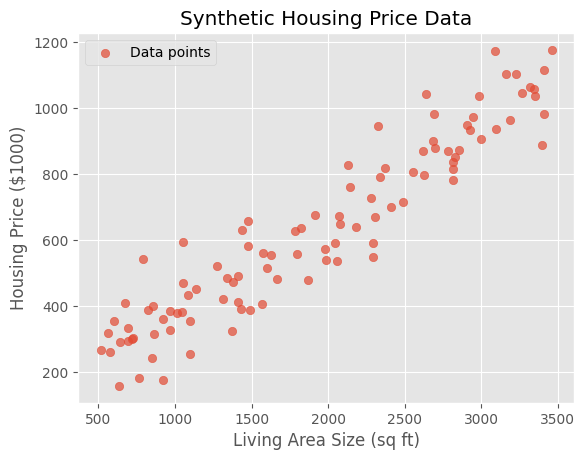

In [13]:
# We will generate synthetic data for the living area size (X) and the housing price (Y).
np.random.seed(42)

# Generating random living area sizes (in square feet)
living_area = np.random.uniform(500, 3500, size=100)

# Setting true parameters for the linear relationship
true_slope = 0.3  # Slope in thousand dollars per square foot
true_intercept = 50  # Intercept in thousand dollars

# Generating housing prices with some noise
noise = np.random.normal(10, 100, size=living_area.shape)  # Noise in thousand dollars
housing_price = true_slope * living_area + true_intercept + noise

# Visualizing the synthetic data
plt.scatter(living_area, housing_price, alpha=0.7, label='Data points')
plt.title("Synthetic Housing Price Data")
plt.xlabel("Living Area Size (sq ft)")
plt.ylabel("Housing Price ($1000)")
plt.legend()
plt.show()

## 2.2 Linear Regression Model Implementation

A simple linear regression model predicts $Y$ using the equation:
$ Y = \theta_0 + \theta_1 X$
Where:
- $\theta_0$ is the intercept.
- $\theta_1$ is the slope of the line.

The following class, `LinearModel`, will be used to fit and evaluate the linear regression model.

**Your Task 1: Implement the `predict` function for the linear model.**

**Your Task 2: Calculate the Mean Squared Error (MSE) (`MSE` function) for model evaluation.**


In [19]:
class LinearModel:
    def __init__(self, learning_rate=0.01, iterations=1000):
        """
        Initialize the LinearModel class.

        Parameters:
        - learning_rate: Step size for gradient descent.
        - iterations: Number of iterations for gradient descent.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.slope = None
        self.intercept = None

    def predict(self, X):
        """
        Predict using the trained linear model.

        Parameters:
        - X: Input features (1D array).

        Returns:
        - Predicted values.
        """
        #############################################################
        # Task 1: Implement the `predict` function for the linear model.
        # Your Turn: write your own code here
        
        predVal = (self.slope*X) + self.intercept
        
        return predVal
        
        
        #############################################################

    def MSE(self, y_true, y_pred):
        """
        Calculate Mean Squared Error (MSE) loss.

        Parameters:
        - y_true: Actual values.
        - y_pred: Predicted values.

        Returns:
        - mse: Mean Squared Error.
        """
        #############################################################
        # Task 2: Calculate the Mean Squared Error (MSE) (`MSE` function) for model evaluation.
        # Your Turn: write your own code here
        
        mse = sum((y_true-y_pred)^2)/len(y_true)
        
        return mse
        #############################################################

    # The `fit` function is used to train the linear regression model using gradient descent. Please do not modify this function.
    def fit(self, X, y, print_interval=100):
        """
        Fit the linear regression model using gradient descent.

        Parameters:
        - X: Input features (1D array).
        - y: Target values (1D array).
        - print_interval: Frequency of printing the current MSE loss.
        """
        # Initialize parameters
        self.slope = 0.0
        self.intercept = 0.0
        n = len(X)

        for i in range(self.iterations):
            # Make predictions
            y_pred = self.slope * X + self.intercept

            # Calculate gradients
            d_slope = (-2 / n) * np.sum(X * (y - y_pred))
            d_intercept = (-2 / n) * np.sum(y - y_pred)

            # Update parameters
            self.slope -= self.learning_rate * d_slope
            self.intercept -= self.learning_rate * d_intercept

            # Print MSE loss at specified intervals
            if (i + 1) % print_interval == 0:
                mse = self.MSE(y, y_pred)
                print(f"Iteration {i + 1}/{self.iterations}, MSE: {mse:.4f}")

## 2.3 Model Training and Evaluation

Now, let's train the model and visualize the results.

**Your Task 3: Plot the regression line**

In [20]:
# Train the model
model = LinearModel(learning_rate=0.0000001, iterations=10)
model.fit(living_area, housing_price, print_interval=1)

# Make predictions
predictions = model.predict(living_area)

# Visualize the results
plt.scatter(living_area, housing_price, alpha=0.7, label='Data points')

#############################################################
# Task 3: Plot the regression line
# Your Turn: write your own code here
plt.line(predictions)
#############################################################

plt.title("Linear Regression Line")
plt.xlabel("Living Area Size (sq ft)")
plt.ylabel("Housing Price ($1000)")
plt.legend()
plt.show()

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

---

# **Part 3: House Price Modeling with sklearn (20 Points Total)**
- 4 code completion tasks, 5 points each


This part demonstrates an **end-to-end** regression workflow. We will:

1. **Load** the data from `train.csv`.
2. **Remove outliers** in `GrLivArea`.
3. Perform **basic feature engineering**:
   - Round `BedroomAbvGr`
   - Bin `YearBuilt` into decades (and one-hot-encode)
   - Manually one-hot-encode `FullBath`, `HalfBath`
4. **Compute correlation** with `SalePrice` and **filter** out features not meeting a threshold of \(|r|\ge 0.3\).
5. **Split** data into train/test sets.
6. **Train and evaluate** multiple models:
   - **LinearRegression**
   - **RandomForestRegressor**
   - **Ridge** (L2 regularized)
   - **Lasso** (L1 regularized, with `max_iter` increased to avoid convergence issues)

We will **evaluate** each model using **Mean Squared Error (MSE)** and the **R^2** score.

---


In [2]:
import numpy as np
import pandas as pd

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

/var/folders/6n/cwl6lb1j5j54r8zxq47cqpbr0000gn/T/ipykernel_2656/344834359.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 3.1 Load Data

We'll use the Ames dataset from `train.csv`. Make sure the file is in the specified path relative to your notebook or adjust the `file_path` accordingly.

The dataset is attached together with the homework notebook.

In [3]:
file_path = "621_data/train.csv"
df = pd.read_csv(file_path)

# Display the first few rows to confirm loading
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Then, we need to define Features (X) and Target (y). We'll choose a subset of columns:

- `GrLivArea`: Above-grade living area
- `BedroomAbvGr`: Number of bedrooms above ground
- `FullBath`: Number of full bathrooms
- `HalfBath`: Number of half bathrooms
- `YearBuilt`: Year the house was built

We'll predict `SalePrice`.

In [4]:
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'YearBuilt']]
y = df['SalePrice']

print("Initial Shape of X:", X.shape)
print("Initial Shape of y:", y.shape)


Initial Shape of X: (1460, 5)
Initial Shape of y: (1460,)


## 3.2 Data Preprocessing & Feature Engineering

We’ll remove outliers in `GrLivArea` using the Z-score method: keep rows where \(|z| < 3\).


In [ ]:
z_scores_grlivarea = zscore(X['GrLivArea'])
outliers_mask = np.abs(z_scores_grlivarea) <= 3

X = X[outliers_mask].copy()
y = y[outliers_mask].copy()

print("Shape of X after outlier removal:", X.shape)
print("Shape of y after outlier removal:", y.shape)


And then, let's do some feature engineering:

1. Round `BedroomAbvGr`: Some data might have non-integer values (rare, but possible). We round to ensure it’s an integer.

2. Bin `YearBuilt` into decades: We'll create a categorical variable by binning the years into 10-year intervals.

3. One-hot encode `FullBath` and `HalfBath` manually: Instead of a single integer column, we create separate columns for each unique value (e.g., `FullBath_0`, `FullBath_1`, etc.).
Instead of a single integer column, we create separate columns for each unique value (e.g., `FullBath_0`, `FullBath_1`, etc.).

4. One-hot encode the binned `YearBuilt`: We use `pd.get_dummies` for these categories. We set `drop_first=True` to avoid the dummy variable trap.

In [ ]:
# 5a. Round BedroomAbvGr
X['BedroomAbvGr'] = X['BedroomAbvGr'].round()

# 5b. Bin YearBuilt
X['YearBuilt_Binned'] = pd.cut(
    X['YearBuilt'],
    bins=list(range(1880, 2030, 10)),  # e.g. 1880-1889, 1890-1899, etc.
    labels=[f"{decade}" for decade in range(1880, 2020, 10)]
)

# 5c. One-hot encode FullBath and HalfBath
for col in ['FullBath', 'HalfBath']:
    unique_vals = X[col].unique()
    for val in unique_vals:
        X[f"{col}_{val}"] = (X[col] == val).astype(int)
    X.drop(columns=[col], inplace=True)

# 5d. One-hot encode binned YearBuilt
X = pd.get_dummies(X, columns=['YearBuilt_Binned'], drop_first=True)

X.head()

Then, we’ll compute the correlation of each feature in `X` with the target `y`, to see which features are strongly correlated.

In [ ]:
corr_with_target = X.corrwith(y)
correlation_summary = pd.DataFrame({
    'Feature': X.columns,
    'Correlation_with_SalePrice': corr_with_target
}).dropna()  # drop any NaNs

print("Full Correlation Summary:")
correlation_summary


We’ll keep features where $|r|\ge 0.3$. Adjust this threshold to keep more or fewer features.


In [ ]:
THRESHOLD = 0.3
keep_features = correlation_summary.loc[
    correlation_summary['Correlation_with_SalePrice'].abs() >= THRESHOLD,
    'Feature'
]

print(f"Features kept (|r| >= {THRESHOLD}):\n", list(keep_features))

# Subset X
X = X[keep_features]
print("New shape of X:", X.shape)


We'll do an 70/30 train/test split using `train_test_split`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

## 3.3 Modeling

We’ll fit and evaluate:

1. **Linear Regression**
2. **Random Forest** (via a pipeline with scaling)
3. **Ridge Regression** (L2 regularization)
4. **Lasso Regression** (L1 regularization, with scaling pipeline)

We'll compare **Mean Squared Error (MSE)** and **R²** for each model.

**Your Task 1: Initialize Linear Regression model**

**Your Task 2: Initializing a Ridge regression model with a regularization parameter (alpha)**

**Your Task 3: Add the Lasso regression model to the pipeline as a step**

**Your Task 4: Use the pipeline to make predictions on the test data (X_test)**


In [ ]:
# (a) Linear Regression

#############################################################
# Task 1: Initialize Linear Regression model
# Your Turn: write your own code here

#############################################################

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("--- Linear Regression ---")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 :", r2_score(y_test, y_pred_lr))


# (b) Random Forest (quick example, no hyperparam tuning here)
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # optional for RF, but consistent pipeline
    ('rf', RandomForestRegressor(random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("\n--- Random Forest ---")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 :", r2_score(y_test, y_pred_rf))


# (c) Ridge Regression
#############################################################
# Task 2: initializing a Ridge regression model with a regularization parameter(alpha)
# Your Turn: write your own code here

#############################################################

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("\n--- Ridge Regression ---")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 :", r2_score(y_test, y_pred_ridge))


# (d) Lasso (with scaling)
#############################################################
# Task 3: Add the Lasso regression model to the pipeline as a step

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    # Your Turn: Add the Lasso regression step here
])
#############################################################
lasso_pipeline.fit(X_train, y_train)

#############################################################
# Task 4: Task: Use the pipeline to make predictions on the test data (X_test)
# Your Turn: write your own code here

#############################################################

print("\n--- Lasso Regression ---")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2 :", r2_score(y_test, y_pred_lasso))

# Part 4. Implementing Logistic Regression by Hand  (20 Points Total)

- 3 code completion tasks, Task 1 & 2: 5 point each; Task 3: 10 points.

Let's do some simple hands-on exercise on _Logistic regression_.  

We'll use a dataset from the popular [UCI dataset repository](https://archive.ics.uci.edu/ml/index.php); in particular, the [Iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset. This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

We'll load in the data, take a look around and train a logistic regression classifier on it. We are going to implement logistic regression from scratch.

Similar to linear regression, in logistic regression, input values ($\mathbf{X}$) are combined linearly using weights or coefficient values to predict an output value ($\mathbf{y}$). A key difference from linear regression is that the output value being modeled is a binary value ($0$ or $1$), rather than a numeric value.

In logistic regression, we’re essentially trying to find the weights that **maximize the likelihood of the training data** $\mathbf{X}$ and use them to categorize the target variable. Unlike linear regression, the likelihood maximization in logistic regression doesn’t have a closed form solution, and we'll need to solve the optimization problem with **gradient descent**.

## Objective

In this part, you will implement parts of a simple logistic regression model from scratch. You are required to complete the following tasks:
1. Implement the `sigmoid` function.
2. Implement the `predict` function for the logistic regression model.
3. Implement the objective function (log-likelihood) for the logistic regression model.

---

## 4.1 Load the Iris dataset

The Iris dataset is a built-in dataset in `sklearn`. We can load it directly from `sklearn.datasets`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

In [ ]:
iris = datasets.load_iris() # Load the Iris dataset from sklearn

By running the following code, we see what the dataset looks like.  

In [ ]:
# Manufacture a dataframe for the raw data for sample inspection
iris_pd = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_pd.head()

In [ ]:
# We can also take a look at some general statistics.
iris_pd.describe()

To simplify things, we take just the first two feature columns. Also, just to simplify things, we'll force the two non-linearly separable classes to be labeled with the same category, ending up with a **binary classification problem**.


In [ ]:
# Take the first two columns to populate a binary classification problem
X_iris = iris.data[:, :2]
# Collapse the other two non-zero class irises as one class
Y_iris = (iris.target != 0) * 1

Now each data point is a 2-dimensional vector, so we can easily visualize it by drawing a figure using the `plt` _matplotlib_ object.

In [ ]:
# Produce a scatterplot for the values
plt.figure(figsize=(10, 6))
plt.scatter(X_iris[Y_iris == 0][:, 0], X_iris[Y_iris == 0][:, 1], color='b', label='0')
plt.scatter(X_iris[Y_iris == 1][:, 0], X_iris[Y_iris == 1][:, 1], color='r', label='1')
plt.legend()
plt.show()

## 4.2 Implement the logistic regression model

### Implement the sigmoid function

Before we dive into logistic regression, let’s take a look at the **logistic function** (or equivalently, sigmoid function), the heart of the logistic regression technique.  The logistic function is defined as:

$$
g(z) = \frac{1}{1 + \exp^{-z}}
$$

It is a "S"-shaped curve that maps any real value to the range between $0$ and $1$:

<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/600px-Logistic-curve.svg.png" width=400 />
</div>

 By Qef (The Standard Logistic Regression) [CC BY 4.0](https://creativecommons.org/licenses/by-sa/4.0/deed.en), via Wikimedia Commons.

**Your task 1: Implement the `sigmoid` function.**

In [5]:
import numpy as np

def sigmoid(z):
    """Calculate the sigmoid function on an input

    Args:
        input (float): The input value to transform

    Returns:
        float: Transformed value for the input; bounded between 0.0 and 1.0
    """

    #############################################################
    # Task 1: Implement the `sigmoid` function.
    # Your Turn: write your own code here
    val = 1/((1+np.exp(-z)))
    
    return val
    #############################################################

You can run the following code to plot the figure of your sigmoid function, and check if your implementation is correct.

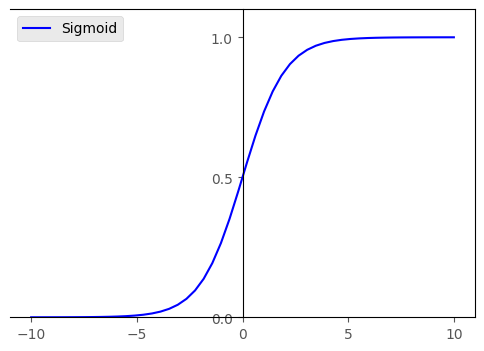

In [6]:
## Plotting testing harness
%matplotlib inline

# set the input space and define the function to plot
x = np.linspace(-10, 10)
y = sigmoid(x)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

# stylize the plot
plt.style.use('ggplot')
plt.xlim(-11,11)
plt.ylim(0,1.1)

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.set_xticks([-10,-5,0,5,10])

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.set_yticks([0,0.5,1])

# perform and show the plot
plt.plot(x,y,label="Sigmoid",color = "blue")
plt.legend()
plt.show()

## 4.3 Implement the prediction function

In summary, the prediction function of logistic regression is as follows:

$$
P(y = 1 | x) = h_{\theta}(x) = \text{sigmoid}(\theta^\top x) \\
P(y = 0 | x) = 1 - P(y = 1 | x) = 1 - h_{\theta}(x)
$$

**Your task 2: Implement the `prediction` function of logistic regression by yourself.**

Inputs:
- `theta`: the weight vector $\theta$ (an $n$-dimensional vector).
- `X`: an $m \times n$ matrix, where the $j$-th row is the $j$-th data point $x^{(j)}$.

Returns: $h_{\theta}(\mathbf{X})$: A numpy array where the $j$-th entry is $h_{\theta}(x^{(j)})$.

In [7]:
def prediction(theta, X):
    """Equivalent .predict() function in sklearn's classifier

    Args:
        theta (array of floats; n): The weight vector of our classifier
        X (array of floats; m x n): The sample we want to test or make a prediction on

    Returns:
        array of floats; n: Prediction for the test_sample
    """

    #############################################################
    # Task 2: Implement the `prediction` function of logistic regression by yourself.
    # Your Turn: write your own code here
    
    pred = 
    
    return pred
    
    #############################################################

SyntaxError: invalid syntax (1615754440.py, line 16)

## 4.4 Calculating the Log-Likelihood

After we build up the logistic regression model, our goal is to search for a value of $\theta$ so that the probability $P(y = 1 | x) = h_{\theta}(x)$ is large when $x$ belongs to the $1$ class, and small when $x$ belongs to the $0$ class. We will learn $\theta$ from the training data.

For a set of training examples with binary labels $\{(x^{(i)}, y^{(i)}) : i = 1, \cdots , m \}$, the log-likelihood of the training data measures how well our model fits the training data. The log-likelihood (denoted as $LL(\theta)$) is calculated as follows (refer to the course lecture notes to see its derivation):

$$
J(\theta) = - \frac{1}{m} \sum_i^m \left(y^{(i)} \log( h_\theta(x^{(i)}) ) + (1 - y^{(i)}) \log( 1 - h_\theta(x^{(i)}) ) \right).
$$

Note that only one of the two terms in the summation is non-zero, for each training example – depending on whether the label $y^{(i)}$ is $0$ or $1$. When $y^{(i)}=1$, minimizing the cost function implies that we need to make $h_{\theta}(x^{(i)})$ large; and when $y^{(i)}=0$, we want to make $1−h_{\theta}$ large, as explained above.





**Your task 3: Implement the `log_likelihood` function.**

Inputs:
- `X`: an $m \times n$ matrix, where the $j$-th row is the feature vector of $x^{(j)}$.
- `y`: a $m$-dimensional vector, where the $j$-th element is $y^{(j)}$.
- `theta`: the weight vector $\theta$ (a $n$-dimentional vector).

Returns: $J(\theta)$: A scalar.

In [ ]:
def log_likelihood(X, y, theta):
    """Calculates the log likelihood of the

    Args:
        X (array of floats; m x n): The input data
        y (array of floats; m): The target values for the data
        theta (array of floats; n): The weight vector \theta

    Returns:
        float: cost, the log likelihood of the data X
    """

    #############################################################
    # Task 3: Implement the `log_likelihood` function.
    # Your Turn: write your own code here
    #
    #############################################################

## 4.5 Training the logistic regression model

We can now put all the parts together to implement the logistic regression model.

In [ ]:
def gradient(X, y, theta):
    """Calculates the gradient of the log likelihood function

    Args:
        X (array of floats; m x n): The input data
        y (array of floats; m): The target values for the data
        theta (array of floats; n): The weight vector \theta

    Returns:
        array of floats; n: The gradient of the log likelihood function
    """
    predictions = prediction(theta, X)
    gradient = np.dot(X.T, (predictions - y)) / float(len(y))
    gradient = gradient.reshape(-1)
    return gradient

def logistic_regression(X, y, num_steps, learning_rate, verbose):
    """Optimises the weights for logistic regression, given a training dataset.

    Args:
        X (array of floats; m x n): The input data
        y (array of floats; m): The target values for the data
        num_steps (int): number of training iteration before termination
        learning_rate (float): learning rate for the gradient descent
        verbose (Boolean): print log-likelihood statistics?

    Returns:
        array of floats; n: The weight vector \theta
    """
    # Add the bias
    bias = np.ones((X.shape[0], 1))
    X = np.concatenate((bias, X), axis=1)

    # Initialize the weights
    weights = np.zeros(X.shape[1])

    # Training with gradient descent
    for step in range(num_steps):
        # Calculate the gradient
        grad = gradient(X, y, weights)
        # Update the weights
        weights = weights - learning_rate * grad
        # Print log-likelihood every step
        cost = log_likelihood(X, y, weights)
        if verbose and step % 10000 == 0:
            print('Number of iterations: {}; cost: {:.5f}'.format(step, cost))

    return weights

# Run the logistic regression model
weights = logistic_regression(X_iris, Y_iris, num_steps = 300000, learning_rate = 0.1, verbose = True)

## 4.6 Model evaluation

Let's inspect what we've done. The following code prints the weights, classification accuracy, and plots the decision boundary.  

In [ ]:
def predict_prob(X, weights):
    """Returns prediction probabilities for the input data
    Args:
        X (array of floats; m x n): The input data
        weights (array of floats; n): The weight vector \theta

    Returns:
        array of floats; n: The predicted probability of +1 class, bounded (0,1)
    """
    # Add the bias, x_0, for each example
    bias = np.ones((X.shape[0], 1))
    X = np.concatenate((bias, X), axis=1)

    return sigmoid(np.dot(X, weights))

print('The learned weights are {}'.format(weights))

preds = predict_prob(X_iris, weights).round()
# Calculate the accuracy
accu = (preds == Y_iris).mean()
print('The classification accuracy: {}'.format(accu))

confidence = [0.5]
boundary_colors = ['black']

plt.figure(figsize=(10, 6))
plt.scatter(X_iris[Y_iris == 0][:, 0], X_iris[Y_iris == 0][:, 1], color='b', label='0')
plt.scatter(X_iris[Y_iris == 1][:, 0], X_iris[Y_iris == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X_iris[:,0].min(), X_iris[:,0].max(),
x2_min, x2_max = X_iris[:,1].min(), X_iris[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = predict_prob(grid, weights).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, confidence, linewidths=1, colors=boundary_colors)
plt.show()

# Declaration of Independent Work  

I hereby declare that this assignment is entirely my own work and that I have neither given nor received unauthorized assistance in completing it. I have adhered to all the guidelines provided for this assignment and have cited all sources from which I derived data, ideas, or words, whether quoted directly or paraphrased.

Furthermore, I understand that providing false declaration is a violation of the University of Arizona's honor code and will result in appropriate disciplinary action consistent with the severity of the violation.

**Name:** Christian J Ortmann \
**Date:** 02/07/2025  